Double cliquer et entrer nom, prénom et groupe ici

# TP 2 : Régression par minimisation avec 2 variables

## Problème A (à faire en parallèle avec l'enseignant)
On considère les points $(1,3)$, $(3,3)$ et $(5,4)$

On cherche l'ordonnée à l'origine $b$ et le coefficient directeur $w$ de la droite d'équation $$y=wx+b$$ minimisant la somme des carrés des distances verticales entre les points et la droite (comme représenté ci-dessous) :
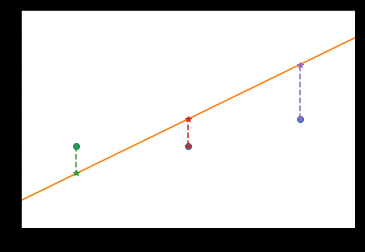

**Exercice**

Compléter la description des trois composantes du programme d'optimisation (selon les notations du cours) :

- Variable décisionnelle $d$ : ...
- Domaine $\mathcal{D}$ : ...
- Critère $f(d)$ : ...

(on ne demande pas de résoudre le programme)

## Exploration graphique
*Ne pas oublier d'exécuter les cellules suivantes, via `CTRL+Entrée`*

In [ ]:
# Chargement des librairies Python

# Mathématiques 
import numpy as np

# Graphique
from matplotlib import pyplot as plt

print('Librairies chargées en mémoire')

### Définition du nuage de points

La liste des points $(1,3)$, $(3,3)$ et $(5,4)$ se définit par la liste des abscisses et la liste des ordonnées.

In [ ]:
X=[1,3,5]
Y=[3,3,4]
print('Données X et Y chargées en mémoire')

### Visualisation des points

In [ ]:
plt.axis([0,6,0,5]) # xmin,xmax,ymin,ymax
plt.plot(X,Y,'o') # représentation graphique des points
plt.show()

### Visualisation d'une droite de régression (pas forcément optimale)

In [ ]:
w=1
b=1
plt.axis([0,6,0,8])
plt.plot(X,Y,'o')
plt.plot([0,6],[b+w*0,b+w*6])
for i in range(len(X)):
    plt.plot([X[i],X[i]],[Y[i],b+w*X[i]],'*--')
    
SommeResidus=0
for i in range(len(X)):
    ri=(Y[i]-(b+w*X[i]))**2
    plt.text(X[i],(Y[i]+b+w*X[i])/2,' $r_'+str(i)+'^2=$'+str(ri))
    SommeResidus=SommeResidus+ri
plt.text(0,6,'Pour $b='+str(b)+'$ et $w='+str(w)+'$: $\sum r_i^2=$'+str(SommeResidus))
plt.show()

**Exercice**

Décrire les rôles des codes de la cellule permettant le générer le graphique précédent :
- `plt.plot([0,6],[b+w*0,b+w*6])` : ...
- `for i in range(len(X)):` : ...
- `SommeResidus=SommeResidus+ri` : 
- `ri=(Y[i]-(b+w*X[i]))**2` : ...

**Exercice**
    
1. Déterminer, en modifiant les valeurs de $b$ et $w$ puis en exécutant la cellule plusieurs fois, une solution approximative $(b^*,w^*)$ du problème A à $10^{-1}$ près.

2. Remarquer le critère `SommeResidus` est beaucoup plus sensible aux variations de $w$ qu'aux variations de $b$ : proposer une explication de ce phénomène.

## Représentation graphique de la fonction à minimiser

### Définition de la fonction

In [ ]:
def f(b,w):
    return np.sum([(b+w*X[i]-Y[i])**2 for i in range(len(X))])

**Exercice**

Dérouler les étapes du calcul de `f(1,2)` du code ci-dessus par Python:

- En mémoire : `b`, valeur : ..., et `w`, valeur : ...
- Premier calcul: `len(X)`, valeur : ...
- Calcul suivant : `range(len(X))`, valeur : ... 
- Calcul suivant : premier `i`, valeur : ... 
- Calcul suivant : `(b+w*X[i]-Y[i])**2`, valeur : 
- Calcul suivant : liste `[...]`, valeur : 
- Calcul suivant : nouveau `i`, valeur : ... 
- Calcul suivant : `(b+w*X[i]-Y[i])**2`, valeur : ...
- Calcul suivant : liste `[...]`, valeur : ...
- (... calculs suivants ...)
- Calcul suivant : dernier `i`, valeur : ... 
- Calcul suivant : `(b+w*X[i]-Y[i])**2`, valeur : ...
- Calcul suivant : liste `[...]`, valeur : ...
- Dernier calcul : `np.sum([...])`, valeur : 


### Création d'un tableau de valeurs pour $f$

**Exercice**

Les valeurs de $f$ sont à calculer pour un ensemble de $b$ et un ensemble de $w$.

Pour créer un tableau de valeurs de $f$, il faut donc faire varier $b$ et $w$ simultanément.

On construit une liste de valeurs de $w$, puis, pour chaque valeur de $w$, une liste de valeurs de $b$, selon le principe suivant :
- `Liste1=[1,2,3,4]`
- `Liste2=[1,2,3,4]`
- `Valeurs=[[calcul(x,y) for x in Liste1] for y in Liste2]`

En supposant par exemple que `calcul(x,y)=x*y', quel sera le contenu de la liste `Valeurs` ci-dessus à l'issue de l'éxécution du code ?

*Réponde ici*

In [ ]:
# Tableau de valeurs de f

blist=np.linspace(-5,5,50) # crée une liste de 50 nombres régulièrement espacés entre -5 et 5
wlist=np.linspace(-5,5,50) # crée une liste de 50 nombres régulièrement espacés entre -5 et 5
flist=[[f(b,w) for b in blist] for w in wlist] # Tableau de valeur de f à 2 dimensions

**Exercice**

Quelles sont les 5 premières valeurs de $b$ et $w$ pour lesquelles est calculé $f(b,w)$ dans la liste `flist` du code ci-dessus ?

*Répondre ici*

### Représentation graphique de la fonction

In [ ]:
plt.axis([-5,5,-5,5]) #xmin,xmax,ymin,ymax

plt.contour(blist,wlist,flist,100)
# crée 100 courbes de niveau de la fonction f
# à partir des valeurs de b,w et de f(b,w) calculées précédemment

plt.colorbar() # affiche une légende avec les niveaux

plt.show()

**Exercice**

Comment expliquer l'allure allongées des ellipses associées aux courbes de niveau ?

Répondre ici

**Exercice**

Changer le tableau de valeur ainsi que les valeurs xmin,xmax,ymin,ymax du graphique précédent afin de visualiser au mieux sur le graphique la solution approximative $(b^*,w^*)$ optimale calculée dans l'exercice 1 et la placer sur le graphique à l'aide de `plt([b*],[w*],'o')`

## Représentation du nuage et de la droite de régression optimale

**Exercice**

Modifier les valeurs de $b$ et $w$ ci-dessous pour représenter le nuage des 3 points ainsi que la droite de régression.

In [ ]:
w=1
b=1
plt.axis([0,6,0,8])
plt.plot(X,Y,'o')
plt.plot([0,6],[b+w*0,b+w*6])

## Problème B

On se donne à présent un paquet de 20 points, on cherche à déterminer la droite $y=b+wx$ minimisant la somme des carrés des distances verticales entre les points et la droite.

Les 20 données sont générées aléatoirement ci-dessous : **il ne faut exécuter cette cellule qu'une fois**, puis copier coller les deux listes de valeurs dans la cellule suivante, afin de les fixer une fois pour toute.

### Génération aléatoire des points

In [ ]:
# Génère un b et un w aléatoires choisis uniformément entre 1 et 2
br=np.random.uniform(1,2)
wr=np.random.uniform(1,2)
# Génère 20 abscisses aléatoires uniformément compris en 0 et 10
L1=np.random.uniform(0, 10, 20)
# Génère 20 ordonnées approximativement égales à br+wr*x
L2=[br+wr*x+np.random.uniform(-3,3) for x in L1]
print('Liste des X à copier-coller ci-dessous:\n')
print(*L1,sep=', ')
print('\nListe des Y à copier-coller ci-dessous:\n')
print(*L2,sep=', ')

In [ ]:
# Définition des données
X=[???]
Y=[???]
print('Données chargées')

### Réprésentation du nuage des points

In [ ]:
plt.axis([-5,15,-5,35])
plt.plot(X,Y,'o')

**Exercice**

En vous inspirant des calculs précédent, compléter par copié-collé les cellules ci-dessous afin de résoudre graphiquement le problème :
- Programmer la fonction $f$ à minimiser
- Calculer un tableau de valeurs de $f$
- Représenter les courbes de niveau de $f$
- Déterminer une valeur approximative de son minimum en lisant le graphique
- Tracer le nuage de point ainsi que la droite de régression trouvée